In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)


In [2]:
df1=pd.read_csv('C:\\Users\\abhis\\Downloads\\Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')

In [6]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2.shape

(13320, 5)

# Data cleaning process


In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df3.shape

(13246, 5)

In [11]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df3['BHK']=df3['size'].apply(lambda x: x.split(' ')[0])
df3.head()

<ipython-input-12-aca66913b795>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']=df3['size'].apply(lambda x: x.split(' ')[0])


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df3['BHK'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [14]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
  

In [16]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
convert_sqft_to_num('2100-2850')

2475.0

In [19]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [20]:
df4.tail()

,location,size,total_sqft,bath,price,BHK
13315,Whitefield,5 Bedroom,3453.0,4.0,231.0,5
13316,Richards Town,4 BHK,3600.0,5.0,400.0,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4
13319,Doddathoguru,1 BHK,550.0,1.0,17.0,1


# 2 . Feature Engineering and dimensionality reduction process


In [21]:

df5=df4.copy()

# 2.1 outlier detection and removal

df5=df4.copy()

In [22]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [23]:
# df5.location = df5.location.apply(lambda x: x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                            534
Sarjapur  Road                        392
Electronic City                       302
Kanakpura Road                        266
Thanisandra                           233
                                     ... 
Konappana Agrahara                      1
Kodanda Reddy Layout                    1
Kirloskar layout, Basaveshwarnagar      1
Kengeri Satellite Town Stage II         1
 Anekal                                 1
Name: location, Length: 1304, dtype: int64

In [24]:
location_stats_lessthan_10=location_stats[location_stats<=10]
location_stats_lessthan_10

location
Ganga Nagar                           10
Nagappa Reddy Layout                  10
BTM 1st Stage                         10
Dodsworth Layout                      10
Kalkere                               10
                                      ..
Konappana Agrahara                     1
Kodanda Reddy Layout                   1
Kirloskar layout, Basaveshwarnagar     1
Kengeri Satellite Town Stage II        1
 Anekal                                1
Name: location, Length: 1063, dtype: int64

In [25]:
len(df5.location.unique())

1304

In [26]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_lessthan_10 else x)

In [27]:
len(df5.location.unique())


242

# outlier detection and removal-:outlier are the datapoints which are data errors or sometime they are not data error but they just represent the  extreme variations(which is not possible) in your dataset. although they are valid , it make sense to remove them otherwise they can cause some issue later on.


In [28]:
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [29]:
df5.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
BHK                object
price_per_sqft    float64
dtype: object

In [30]:
df5["BHK"] = df5["BHK"].astype(str).astype(float)
# type conversion
df5.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
BHK               float64
price_per_sqft    float64
dtype: object

In [31]:
df5[df5.total_sqft/df5.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8.0,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3.0,20000.000000


In [32]:
df6=df5[~(df5.total_sqft/df5.BHK<300)]

In [33]:
df6.shape

(12502, 7)

In [34]:
df6.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


In [35]:
df6.price_per_sqft.describe()
# describe() gives basic statistics of specific column

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
for key, subdf in df6.groupby('location'):
    print(subdf)

                   location       size  total_sqft  bath  price  BHK  \
152     Devarachikkanahalli      3 BHK      1250.0   2.0   44.0  3.0   
341     Devarachikkanahalli      2 BHK      1250.0   2.0   40.0  2.0   
2474    Devarachikkanahalli  2 Bedroom      1200.0   2.0   83.0  2.0   
5030    Devarachikkanahalli      2 BHK      1170.0   2.0   40.0  2.0   
5536    Devarachikkanahalli  3 Bedroom      1200.0   3.0  160.0  3.0   
5771    Devarachikkanahalli      3 BHK      1425.0   2.0   65.0  3.0   
6591    Devarachikkanahalli      2 BHK       947.0   2.0   43.0  2.0   
7536    Devarachikkanahalli      2 BHK      1130.0   2.0   36.0  2.0   
7767    Devarachikkanahalli      3 BHK      1417.0   2.0   76.0  3.0   
8268    Devarachikkanahalli      2 BHK      1230.0   2.0   58.0  2.0   
8954    Devarachikkanahalli      3 BHK      1705.0   3.0   75.0  3.0   
9894    Devarachikkanahalli      2 BHK      1116.0   2.0   47.0  2.0   
10582   Devarachikkanahalli      2 BHK       991.0   2.0   40.0 

        location       size  total_sqft  bath   price  BHK  price_per_sqft
350    Ardendale      2 BHK     1100.00   2.0   43.25  2.0     3931.818182
444    Ardendale      3 BHK     1750.00   3.0  100.00  3.0     5714.285714
1595   Ardendale      4 BHK     3198.00   4.0  200.00  4.0     6253.908693
1719   Ardendale      4 BHK     2422.00   4.0  160.00  4.0     6606.110652
2665   Ardendale      3 BHK     1750.00   3.0  100.00  3.0     5714.285714
2694   Ardendale  4 Bedroom     3200.00   4.0  205.00  4.0     6406.250000
2782   Ardendale      3 BHK     1728.00   3.0   95.00  3.0     5497.685185
2976   Ardendale      2 BHK     1100.00   2.0   48.00  2.0     4363.636364
3936   Ardendale  5 Bedroom     4355.00   3.0  350.00  5.0     8036.739380
3978   Ardendale      4 BHK     3198.00   4.0  250.00  4.0     7817.385866
4214   Ardendale      4 BHK     2062.00   3.0  140.00  4.0     6789.524733
4512   Ardendale      3 BHK     1732.46   3.0   92.00  3.0     5310.367916
4754   Ardendale      4 B

13307  Billekahalli      3 BHK      1805.0   3.0  134.00  3.0     7423.822715
         location       size  total_sqft  bath   price  BHK  price_per_sqft
21     Binny Pete      3 BHK      1755.0   3.0  122.00  3.0     6951.566952
1298   Binny Pete      1 BHK       665.0   1.0   50.75  1.0     7631.578947
1478   Binny Pete      3 BHK      2465.0   5.0  234.00  3.0     9492.900609
1665   Binny Pete      3 BHK      1282.0   3.0  178.00  3.0    13884.555382
2037   Binny Pete      2 BHK      1245.0   2.0   86.28  2.0     6930.120482
2858   Binny Pete      1 BHK       660.0   1.0   54.00  1.0     8181.818182
2918   Binny Pete      2 BHK      1350.0   2.0   91.00  2.0     6740.740741
3336   Binny Pete      1 BHK       665.0   1.0   46.08  1.0     6929.323308
3605   Binny Pete      1 BHK       660.0   1.0   62.00  1.0     9393.939394
3687   Binny Pete      2 BHK      1365.0   2.0  122.00  2.0     8937.728938
3714   Binny Pete      4 BHK      2940.0   6.0  280.00  4.0     9523.809524
5096   Bin

10955  Giri Nagar  1 Bedroom       600.0   1.0  125.0  1.0    20833.333333
                     location   size  total_sqft  bath  price  BHK  \
280    Gollarapalya Hosahalli  2 BHK       861.0   2.0   34.5  2.0   
2365   Gollarapalya Hosahalli  3 BHK      1408.0   3.0   62.0  3.0   
3139   Gollarapalya Hosahalli  3 BHK      1605.0   3.0   50.0  3.0   
5029   Gollarapalya Hosahalli  2 BHK       861.0   2.0   34.5  2.0   
5121   Gollarapalya Hosahalli  3 BHK      1318.0   3.0   54.0  3.0   
6448   Gollarapalya Hosahalli  2 BHK       861.0   2.0   36.5  2.0   
7329   Gollarapalya Hosahalli  3 BHK      1320.0   3.0   60.0  3.0   
8463   Gollarapalya Hosahalli  3 BHK      1345.0   3.0   60.0  3.0   
8695   Gollarapalya Hosahalli  2 BHK       996.0   2.0   49.0  2.0   
9859   Gollarapalya Hosahalli  4 BHK      1905.0   3.0   86.0  4.0   
11624  Gollarapalya Hosahalli  2 BHK       996.0   2.0   36.5  2.0   
12013  Gollarapalya Hosahalli  3 BHK      1318.0   3.0   56.0  3.0   
12501  Gollarap

12867  Indira Nagar  6 Bedroom      2400.0   6.0   475.0  6.0    19791.666667
       location       size  total_sqft  bath  price  BHK  price_per_sqft
309    JP Nagar      3 BHK      1850.0   3.0  150.0  3.0     8108.108108
507    JP Nagar      2 BHK      1000.0   2.0   35.0  2.0     3500.000000
1055   JP Nagar      2 BHK      1100.0   2.0   70.0  2.0     6363.636364
1339   JP Nagar      2 BHK       940.0   2.0   49.0  2.0     5212.765957
1425   JP Nagar  3 Bedroom      2500.0   3.0  135.0  3.0     5400.000000
...         ...        ...         ...   ...    ...  ...             ...
11968  JP Nagar      3 BHK      1520.0   3.0  125.0  3.0     8223.684211
12311  JP Nagar      2 BHK      1405.0   2.0   99.0  2.0     7046.263345
12860  JP Nagar      2 BHK      1157.0   2.0   73.0  2.0     6309.420916
13039  JP Nagar      3 BHK      1500.0   2.0   82.0  3.0     5466.666667
13236  JP Nagar      2 BHK      1048.0   2.0   44.0  2.0     4198.473282

[65 rows x 7 columns]
      location   size  

13115  Kammasandra      1 BHK       610.0   1.0  18.50  1.0     3032.786885
         location       size  total_sqft  bath    price  BHK  price_per_sqft
590    Kanakapura      3 BHK      1419.0   3.0   75.000  3.0     5285.412262
623    Kanakapura      1 BHK       711.0   1.0   36.000  1.0     5063.291139
1030   Kanakapura      1 BHK       711.0   1.0   38.000  1.0     5344.585091
1067   Kanakapura      2 BHK       929.0   2.0   46.000  2.0     4951.560818
1560   Kanakapura      2 BHK      1090.0   2.0   32.690  2.0     2999.082569
1627   Kanakapura      1 BHK       551.0   1.0   30.000  1.0     5444.646098
1958   Kanakapura      2 BHK      1020.0   2.0   42.830  2.0     4199.019608
1999   Kanakapura      3 BHK      1699.0   3.0   97.000  3.0     5709.240730
2508   Kanakapura      3 BHK      1290.0   2.0   45.150  3.0     3500.000000
2748   Kanakapura      2 BHK      1130.0   2.0   45.200  2.0     4000.000000
3049   Kanakapura      3 BHK      1476.0   3.0   75.000  3.0     5081.300813


[63 rows x 7 columns]
      location   size  total_sqft  bath   price  BHK  price_per_sqft
756      Kudlu  2 BHK      1152.0   2.0   53.50  2.0     4644.097222
2573     Kudlu  2 BHK      1027.0   2.0   43.00  2.0     4186.952288
2970     Kudlu  2 BHK      1092.0   2.0   44.00  2.0     4029.304029
3825     Kudlu  2 BHK      1027.0   2.0   43.00  2.0     4186.952288
3951     Kudlu  2 BHK      1092.0   2.0   44.00  2.0     4029.304029
4784     Kudlu  2 BHK      1143.0   2.0   55.00  2.0     4811.898513
5768     Kudlu  3 BHK      1455.0   2.0   60.00  3.0     4123.711340
5957     Kudlu  3 BHK      1293.0   2.0   85.00  3.0     6573.859242
6748     Kudlu  2 BHK      1024.0   2.0   44.00  2.0     4296.875000
7372     Kudlu  3 BHK      1570.0   2.0   65.94  3.0     4200.000000
7503     Kudlu  3 BHK      1600.0   3.0   79.00  3.0     4937.500000
7683     Kudlu  2 BHK      1027.0   2.0   42.00  2.0     4089.581305
9009     Kudlu  2 BHK      1076.0   2.0   50.00  2.0     4646.840149
9114     Kud

       location       size  total_sqft  bath   price  BHK  price_per_sqft
177    Nagavara  1 Bedroom      400.00   1.0   14.00  1.0     3500.000000
1976   Nagavara      4 BHK     2172.65   3.0  120.00  4.0     5523.208984
2303   Nagavara      2 BHK     2200.00   2.0   55.00  2.0     2500.000000
2512   Nagavara      3 BHK     1545.00   2.0   58.00  3.0     3754.045307
2599   Nagavara      3 BHK     2319.00   3.0  180.00  3.0     7761.966365
3104   Nagavara      3 BHK     2430.00   4.0  180.00  3.0     7407.407407
6720   Nagavara      2 BHK      936.00   2.0   40.20  2.0     4294.871795
7530   Nagavara      2 BHK     1125.00   2.0   44.50  2.0     3955.555556
7714   Nagavara      3 BHK     2400.00   3.0  251.00  3.0    10458.333333
7943   Nagavara      2 BHK     1315.00   2.0   70.00  2.0     5323.193916
8479   Nagavara      2 BHK     1077.00   2.0   50.00  2.0     4642.525534
8678   Nagavara      4 BHK     2496.00   4.0  125.00  4.0     5008.012821
9893   Nagavara      2 BHK     1110.00

12886  Sompura  4 BHK      2150.0   3.0   85.0  4.0     3953.488372
           location   size  total_sqft  bath   price  BHK  price_per_sqft
1304   Sonnenahalli  3 BHK      1415.0   2.0  55.000  3.0     3886.925795
1993   Sonnenahalli  2 BHK       896.0   2.0  43.750  2.0     4882.812500
2199   Sonnenahalli  2 BHK      1268.0   2.0  73.000  2.0     5757.097792
2588   Sonnenahalli  2 BHK      1120.0   2.0  43.000  2.0     3839.285714
3137   Sonnenahalli  2 BHK      1100.0   2.0  44.000  2.0     4000.000000
3465   Sonnenahalli  2 BHK      1011.0   2.0  50.530  2.0     4998.021761
3603   Sonnenahalli  2 BHK      1157.0   2.0  42.000  2.0     3630.077787
3941   Sonnenahalli  1 BHK       605.0   1.0  40.000  1.0     6611.570248
5908   Sonnenahalli  1 BHK       614.5   1.0  30.715  1.0     4998.372661
6924   Sonnenahalli  3 BHK      1310.0   2.0  46.000  3.0     3511.450382
7443   Sonnenahalli  3 BHK      1484.0   3.0  74.180  3.0     4998.652291
7866   Sonnenahalli  3 BHK      1610.0   3.0

In [37]:
#Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices.
#We should remove outliers per location using mean and one standard deviation
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10244, 7)

In [38]:
df7.price_per_sqft.describe()

count    10244.000000
mean      5657.802131
std       2266.273845
min       1250.000000
25%       4244.178277
50%       5172.846776
75%       6426.419630
max      24509.803922
Name: price_per_sqft, dtype: float64

In [39]:
df7.shape

(10244, 7)

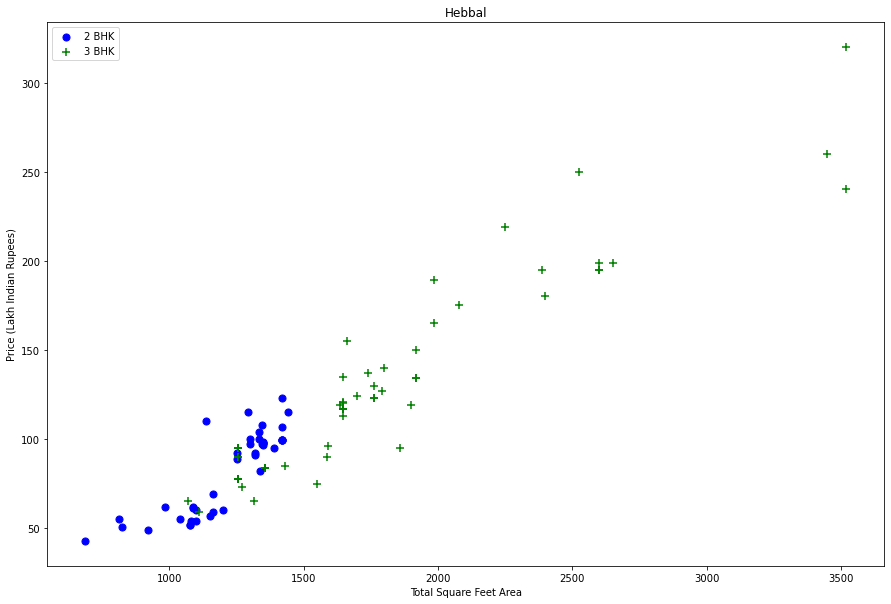

In [40]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Hebbal")

In [41]:
# We should also remove properties where for same location, the price of (for example)
# 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). 
# What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

# {
#     '1' : {
#         'mean': 4000,
#         'std: 2000,
#         'count': 34
#     },
#     '2' : {
#         'mean': 4300,
#         'std: 2300,
#         'count': 22
#     },    
# }
# Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [42]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):# grouping in refrence to location
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):# grouping in refrence to bhk
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            #print(bhk_df)
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            print(stats)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

None
{'mean': 4278.151140436048, 'std': 1139.01580064035, 'count': 8}
None
{'mean': 11983.805668016194, 'std': 0.0, 'count': 1}
{'mean': 11756.16905248807, 'std': 701.6243657657865, 'count': 3}
None
{'mean': 5952.380952380952, 'std': 0.0, 'count': 1}
{'mean': 7931.806799837383, 'std': 1534.1422783514054, 'count': 8}
{'mean': 9151.192151725822, 'std': 1054.731726021645, 'count': 7}
{'mean': 7537.92218148637, 'std': 1607.0591069513537, 'count': 3}
None
{'mean': 3851.8518518518517, 'std': 497.593660834978, 'count': 3}
None
None
None
{'mean': 4755.410708222867, 'std': 374.06419031565235, 'count': 3}
None
{'mean': 3611.1111111111113, 'std': 0.0, 'count': 1}
None
{'mean': 4628.623188405797, 'std': 371.376811594203, 'count': 2}
{'mean': 5067.359785883266, 'std': 453.24956183513086, 'count': 17}
None
None
{'mean': 5932.976565810136, 'std': 671.9347030151997, 'count': 8}
{'mean': 8403.2863080867, 'std': 1515.4146231166221, 'count': 5}
None
{'mean': 6133.333333333334, 'std': 133.33333333333348, 

None
{'mean': 8230.365020192607, 'std': 2084.870283562963, 'count': 5}
None
{'mean': 19562.04239043375, 'std': 1371.647354515775, 'count': 8}
None
{'mean': 5790.960451977401, 'std': 0.0, 'count': 1}
{'mean': 5113.831187981814, 'std': 479.0067310357899, 'count': 7}
None
{'mean': 5117.938928017428, 'std': 689.5131286166418, 'count': 6}
None
{'mean': 4559.695263559465, 'std': 476.6579147263085, 'count': 6}
{'mean': 4952.787098845229, 'std': 492.9480389583671, 'count': 13}
None
None
{'mean': 4271.409551033765, 'std': 572.5384233681566, 'count': 19}
None
None
{'mean': 6861.368629625442, 'std': 792.385913681854, 'count': 3}
None
{'mean': 4009.260011822078, 'std': 22.428701187061954, 'count': 6}
None
{'mean': 3193.939393939394, 'std': 145.7068518808643, 'count': 3}
{'mean': 3695.715772231204, 'std': 513.1647769886983, 'count': 14}
None
{'mean': 9445.779914529914, 'std': 948.6331997307019, 'count': 3}
{'mean': 7329.742881854468, 'std': 773.8913545349003, 'count': 3}
None
{'mean': 3322.66088982

None
{'mean': 5500.0, 'std': 0.0, 'count': 1}
None
{'mean': 5208.333333333333, 'std': 0.0, 'count': 1}
{'mean': 4651.883076314409, 'std': 642.90451560445, 'count': 13}
None
{'mean': 5646.853146853147, 'std': 646.8531468531469, 'count': 2}
{'mean': 5274.4401769080805, 'std': 359.1996745553106, 'count': 7}
None
{'mean': 4102.12346939793, 'std': 591.7443122845393, 'count': 9}
{'mean': 4390.756355620633, 'std': 671.539951835691, 'count': 30}
None
None
None
{'mean': 3416.085803355814, 'std': 180.47203987792676, 'count': 3}
{'mean': 4161.885658225768, 'std': 587.9649928204554, 'count': 20}
None
{'mean': 3250.0, 'std': 0.0, 'count': 1}
{'mean': 3285.4634212085666, 'std': 199.6880849428014, 'count': 7}
None
{'mean': 4000.0, 'std': 0.0, 'count': 1}
{'mean': 4464.71665687586, 'std': 329.5744118140759, 'count': 10}
None
None
{'mean': 4568.752583055242, 'std': 504.85018578262014, 'count': 7}
None
{'mean': 8091.603053435115, 'std': 0.0, 'count': 1}
{'mean': 5375.328083989501, 'std': 1663.9012335209

None
{'mean': 3195.945945945946, 'std': 0.0, 'count': 1}
{'mean': 2980.300110459942, 'std': 240.74806987622512, 'count': 6}
None
{'mean': 7556.675062972292, 'std': 0.0, 'count': 1}
{'mean': 6104.475872678937, 'std': 867.7629358050074, 'count': 4}
None
{'mean': 8517.539849533492, 'std': 29.88399409911783, 'count': 4}
{'mean': 8621.066433566433, 'std': 944.6855296740544, 'count': 6}
None
{'mean': 4329.211790848419, 'std': 1166.1042598803597, 'count': 8}
{'mean': 5367.419714920858, 'std': 1586.8132900699522, 'count': 11}
None
{'mean': 4708.333333333334, 'std': 291.6666666666665, 'count': 2}
{'mean': 4899.966766367564, 'std': 364.7021331777603, 'count': 3}
None
{'mean': 8010.471204188481, 'std': 0.0, 'count': 1}
{'mean': 8177.670428057425, 'std': 1680.2831248065638, 'count': 4}
None
{'mean': 4612.819625700124, 'std': 506.83386852214045, 'count': 10}
{'mean': 4522.865156428246, 'std': 498.5677172187002, 'count': 7}
None
{'mean': 5360.675549919206, 'std': 593.8769277607065, 'count': 8}
{'mea

(7342, 7)

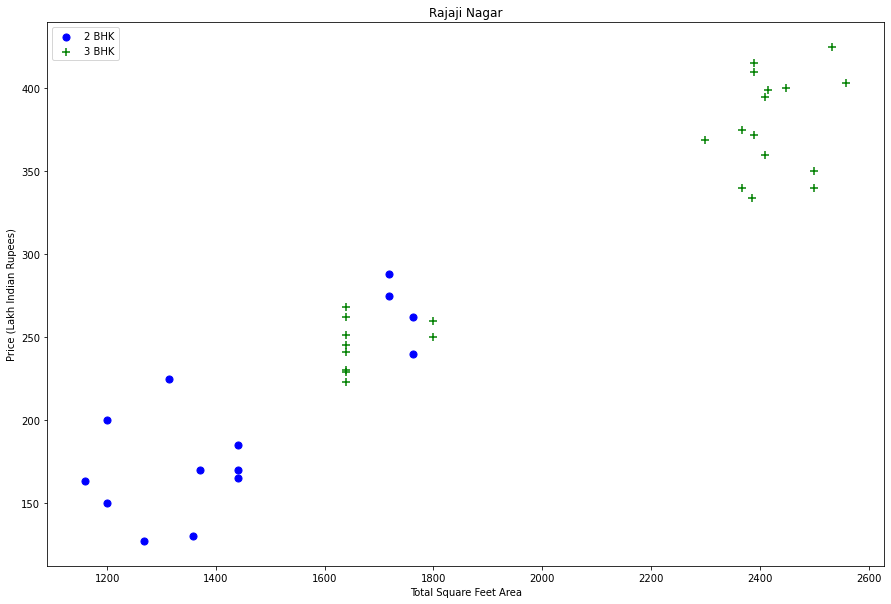

In [43]:
plot_scatter_chart(df8,"Rajaji Nagar")

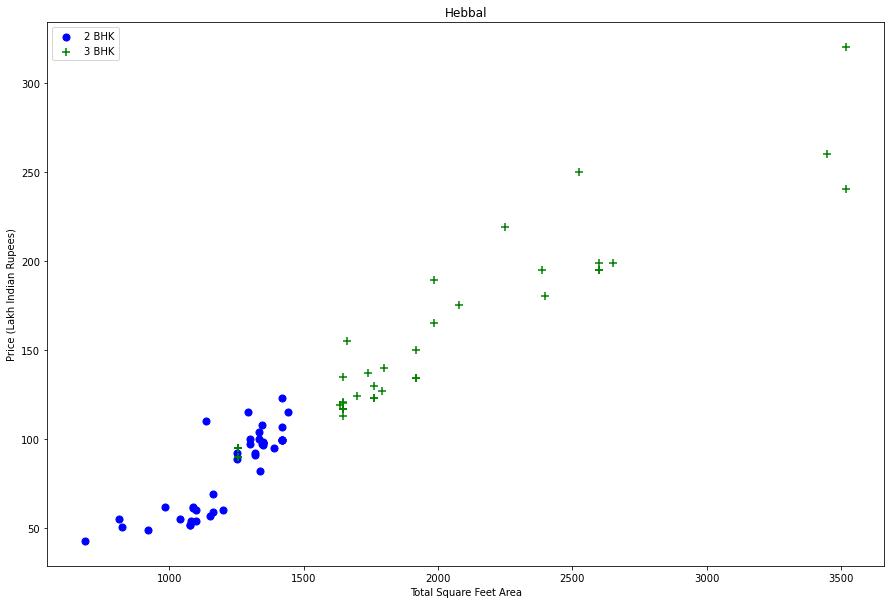

In [44]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

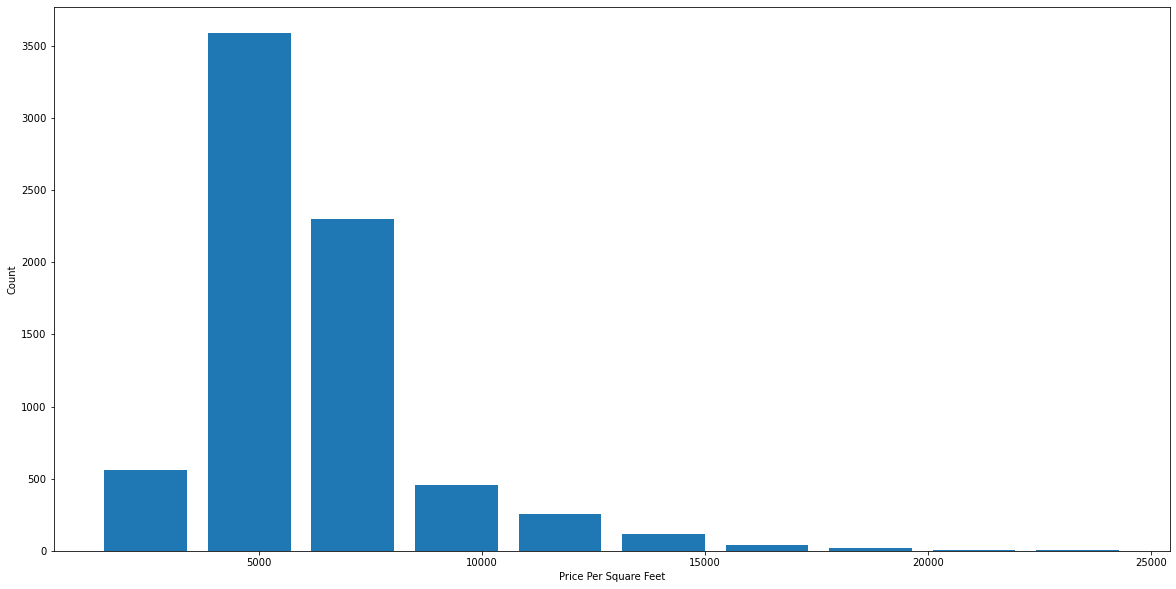

In [45]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [46]:
df8

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2.0,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2.0,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2.0,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3.0,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2.0,4540.654699
...,...,...,...,...,...,...,...
10235,other,2 BHK,1200.0,2.0,70.0,2.0,5833.333333
10236,other,1 BHK,1800.0,1.0,200.0,1.0,11111.111111
10239,other,2 BHK,1353.0,2.0,110.0,2.0,8130.081301
10240,other,1 Bedroom,812.0,1.0,26.0,1.0,3201.970443


Text(0, 0.5, 'Count')

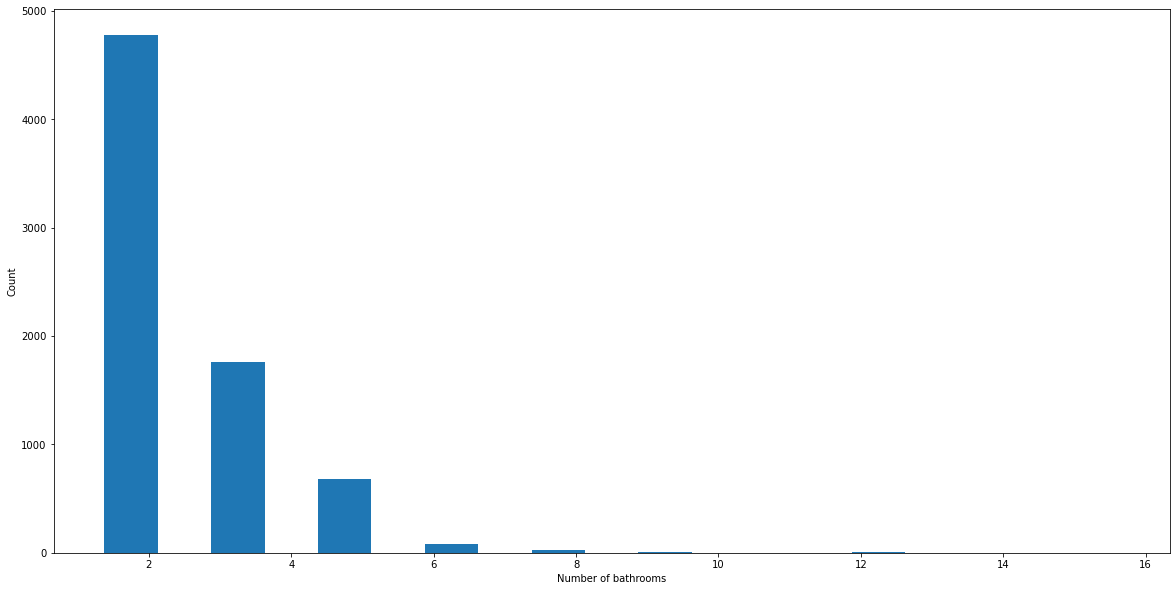

In [47]:
plt.hist(df8.bath,rwidth=0.5)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [48]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10.0,4000.000000
8481,other,10 BHK,12000.0,12.0,525.0,10.0,4375.000000
8570,other,16 BHK,10000.0,16.0,550.0,16.0,5500.000000
9309,other,11 BHK,6000.0,12.0,150.0,11.0,2500.000000
9641,other,13 BHK,5425.0,13.0,275.0,13.0,5069.124424


In [49]:
#It is unusual to have 2 more bathrooms than number of bedrooms in a home
# lets see the count




In [50]:
#Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if 
# you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that 
#is an outlier or a data error and can be removed
df9 = df8[~(df8.bath>df8.BHK+2)]
df9.shape

(7338, 7)

In [51]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,BHK
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0


# Use One Hot Encoding For Location

In [52]:
dummies=pd.get_dummies(df10.location)
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df12=df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# MODEL BUILDING PROCESS STARTS FROM HERE.....

In [55]:
df12.shape

(7338, 245)

In [56]:
X=df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y = df12.price
y.head(10)

1     40.0
2     83.0
3     40.0
4     65.0
5     43.0
6     36.0
7     76.0
8     58.0
9     75.0
10    47.0
Name: price, dtype: float64

In [58]:
len(y)

7338

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [60]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8392267401374934

#We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

# Find best model using GridSearchCV

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.81104968, 0.8374246 , 0.84924769, 0.81449485, 0.79792368])

In [62]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


,model,best_score,best_params
0,linear_regression,0.822028,{'normalize': True}
1,lasso,0.691564,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.714373,"{'criterion': 'mse', 'splitter': 'random'}"


# Test the model for few properties

In [63]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [64]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

84.80096614044116

In [65]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

88.2912000585572

In [66]:
predict_price('Indira Nagar',1000, 2, 2)

175.0618270681904

In [67]:
predict_price('Indira Nagar',1000, 3, 3)

178.55206098630643

# Export the tested model to a pickle file 

In [72]:
import pickle
with open('C:\\code\\bhp\\model\\Bengaluru_House_Data.pickle','wb') as f:
    pickle.dump(lr_clf,f)

# Export location and column information to a file that will be useful later on in our prediction application

In [74]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("C:\\code\\bhp\\model\\columns.json","w") as f:
    f.write(json.dumps(columns))